<div class="alert alert-block alert-success">
    
# ArXiv NLP Analysis
#### Created by: Robiatul Adawiyah Al-Qosh
#### Date: 30/01/2025
#### Environment: Python 3.10 (Google Colab)

</div>

<div class="alert alert-block alert-info">
    
## Table of Content

[Introduction](#intro) <br>
$\;\;\;\;$[Libraries Used](#libraries) <br>
$\;\;\;\;$[Datasets](#datasets) <br>
[Part 1:  Text Classification](#part1) <br>
$\;\;\;\;$[Part 1A: Statistical Method](#statistic) <br>
$\;\;\;\;$[Part 1B: RNN Method](#RNN) <br>
$\;\;\;\;$[Part 1C: Results of Methods](#result) <br>
$\;\;\;\;$[Part 1D: Plots of Methods](#plot) <br>
[Part 2:  Topic Modelling](#part2) <br>
$\;\;\;\;$[Part 2A: Data Pre-Processing](#preprocess) <br>
$\;\;\;\;$[Part 2B: Exploratory Data Analysis](#eda) <br>
$\;\;\;\;$[Part 2C: LDA Training](#train) <br>
$\;\;\;\;$[Part 2D: LDA Visaulization](#vis) <br>
$\;\;\;\;$[Part 2E: Results Conclusion](#conc) <br>
[References](#Ref) <br>

</div>


<div class="alert alert-block alert-warning">

## Introduction <a class="anchor" name="intro"></a>

In this project, we aim to explore and analyze text classification and topic modeling techniques using a dataset derived from arXiv.org. The dataset consists of research articles tagged as Computer Science, spanning from 2016 to 2024. Each article is labeled based on three categories: Computational Linguistics, Information Theory, and Computer Vision. This assignment is divided into two major parts: Text Classification and Topic Modeling.

</div>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div class="alert alert-block alert-info">
   
### Libraries Used <a class="anchor" name="libraries"></a>

The libraries that used in this project include:

- **pandas** (for data manipulation tasks)  
- **re** (for text cleaning with regular expressions)  
- **nltk** (for natural language processing)  
- **nltk.tokenize.word_tokenize** (for splitting text into words)  
- **nltk.stem.WordNetLemmatizer** (for lemmatization)  
- **sklearn.feature_extraction.text.TfidfVectorizer** (for text vectorization)  
- **numpy** (for numerical computations)  
- **sklearn.linear_model.LogisticRegression** (for statistical text classification)  
- **sklearn.metrics** (for model evaluation)  
- **torch** (for deep learning and RNN implementation)  
- **torchtext.data.utils.get_tokenizer** (for tokenizing text)  
- **torchtext.vocab.build_vocab_from_iterator** (for building vocabulary)  
- **torch.nn.utils.rnn.pad_sequence** (for padding sequences)  
- **torch.utils.data.Dataset** (for dataset management)  
- **torch.nn** (for defining neural networks)  
- **torch.optim** (for model optimization)  
- **time** (for tracking model training time)  
- **torch.utils.data.DataLoader** (for batch processing)  
- **matplotlib.pyplot** (for static data visualization)  
- **spacy** (for advanced NLP processing)  
- **string** (for handling text-related operations)  
- **gensim.models.Phrases** (for bigram generation)  
- **wordcloud.WordCloud** (for generating word clouds)  
- **seaborn** (for enhanced data visualization)  
- **plotly.express** (for interactive visualizations)  
- **collections.Counter** (for counting word frequencies)  
- **gensim** (for topic modeling and NLP tasks)  
- **gensim.corpora** (for creating dictionary and corpus)  
- **pyLDAvis** (for interactive topic modeling visualization)  
- **pyLDAvis.gensim_models** (for LDA visualization with Gensim)  

</div>

In [ ]:
# Install necessary libraries
!pip install nltk
!pip uninstall torch -y
!pip install torch==2.3.0+cu121 --extra-index-url https://download.pytorch.org/whl/cu121
!pip install torchtext==0.18
!pip install pyLDAvis

Found existing installation: torch 2.5.1+cu124
Uninstalling torch-2.5.1+cu124:
  Successfully uninstalled torch-2.5.1+cu124
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.0/781.0 MB 726.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/19

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
import torch
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset
import torch.nn as nn
import torch.optim as optim
import time
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import spacy
import string
from gensim.models import Phrases
from wordcloud import WordCloud
import seaborn as sns
import plotly.express as px
from collections import Counter
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

<div class="alert alert-block alert-info">
   
### Datasets <a class="anchor" name="datasets"></a>

The dataset provided is represented in a CSV file format and divided into three subsets: *train_set.csv* ; *dev_set.csv* ; and *test_set.csv*.

</div>

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks//train_set.csv')
df_dev = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dev_set.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_set.csv')

The first dataset is *train_set.csv*, which is used for training the models.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152586 entries, 0 to 152585
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   title                     152586 non-null  object
 1   abstract                  152586 non-null  object
 2   InformationTheory         152586 non-null  int64 
 3   ComputationalLinguistics  152586 non-null  int64 
 4   ComputerVision            152586 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 5.8+ MB


In [ ]:
df_train.describe(include='all')

,title,abstract,InformationTheory,ComputationalLinguistics,ComputerVision
count,152586,152586,152586.000000,152586.000000,152586.000000
unique,152517,152564,NaN,NaN,NaN
top,BERTnesia: Investigating the capture and forge...,We present a solution for the goal of extrac...,NaN,NaN,NaN
freq,2,2,NaN,NaN,NaN
mean,NaN,NaN,0.149922,0.270051,0.580027
std,NaN,NaN,0.356996,0.443987,0.493556
min,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,0.000000,1.000000
75%,NaN,NaN,0.000000,1.000000,1.000000


In [ ]:
df_train.head()

,title,abstract,InformationTheory,ComputationalLinguistics,ComputerVision
0,Large-Scale Study of Curiosity-Driven Learning,Reinforcement learning algorithms rely on ca...,0,0,1
1,Entanglement-assisted quantum error-correcting...,We prove that the known formulae for computi...,1,0,0
2,PromptCBLUE: A Chinese Prompt Tuning Benchmark...,Biomedical language understanding benchmarks...,0,1,0
3,Nonlinear consensus+innovations under correlat...,We consider distributed recursive estimation...,1,0,0
4,Fine-Grained Off-Road Semantic Segmentation an...,Road detection or traversability analysis ha...,0,0,1


The second dataset is *dev_set.csv*, which is used for model validation and tuning.

In [ ]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19073 entries, 0 to 19072
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     19073 non-null  object
 1   abstract                  19073 non-null  object
 2   InformationTheory         19073 non-null  int64 
 3   ComputationalLinguistics  19073 non-null  int64 
 4   ComputerVision            19073 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 745.2+ KB


In [ ]:
df_dev.describe(include='all')

,title,abstract,InformationTheory,ComputationalLinguistics,ComputerVision
count,19073,19073,19073.000000,19073.000000,19073.000000
unique,19070,19072,NaN,NaN,NaN
top,ASFD: Automatic and Scalable Face Detector,Classical communication paradigms focus on a...,NaN,NaN,NaN
freq,2,2,NaN,NaN,NaN
mean,NaN,NaN,0.150422,0.264720,0.584858
std,NaN,NaN,0.357494,0.441195,0.492759
min,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,0.000000,1.000000
75%,NaN,NaN,0.000000,1.000000,1.000000


The third dataset is *test_set.csv*, which is used for final model evaluation.

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19074 entries, 0 to 19073
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     19074 non-null  object
 1   abstract                  19074 non-null  object
 2   InformationTheory         19074 non-null  int64 
 3   ComputationalLinguistics  19074 non-null  int64 
 4   ComputerVision            19074 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 745.2+ KB


In [ ]:
df_test.describe(include='all')

,title,abstract,InformationTheory,ComputationalLinguistics,ComputerVision
count,19074,19074,19074.000000,19074.000000,19074.000000
unique,19073,19074,NaN,NaN,NaN
top,Mutual Information Learned Classifiers: an Inf...,"We present SHIFT3D, a differentiable pipelin...",NaN,NaN,NaN
freq,2,1,NaN,NaN,NaN
mean,NaN,NaN,0.151148,0.262452,0.586400
std,NaN,NaN,0.358203,0.439978,0.492491
min,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,0.000000,1.000000
75%,NaN,NaN,0.000000,1.000000,1.000000


In [ ]:
df_test.head()

,title,abstract,InformationTheory,ComputationalLinguistics,ComputerVision
0,SHIFT3D: Synthesizing Hard Inputs For Tricking...,"We present SHIFT3D, a differentiable pipelin...",0,0,1
1,An Empirical Study of Discriminative Sequence ...,This paper presents an empirical study of tw...,0,1,0
2,Coded Caching with Low Subpacketization Levels,Caching is popular technique in content deli...,1,0,0
3,Training Convolutional Neural Networks With He...,Recent work has shown that biologically plau...,0,0,1
4,"FDNet: Focal Decomposed Network for Efficient,...",This paper presents FDNet: a Focal Decompose...,1,0,0


From the description data, there is a possibility of duplicates in the three datasets. So before we go trough the text classification method, we have to clean the data.

In [ ]:
# See the duplicate exixtancies
print(f"The number of duplicates in train data is: ", sum(df_train.duplicated()))
print(f"The number of duplicates in dev data is: ", sum(df_dev.duplicated()))
print(f"The number of duplicates in test data is: ", sum(df_test.duplicated()))

The number of duplicates in train data is:  12
The number of duplicates in dev data is:  1
The number of duplicates in test data is:  0


Then, we remove the duplicates. Also, it is mentioned that there is 1 binary classification task (ComputationalLinguistics vs. Other two classes); therefore, the columns other than ComputationalLinguistics will be removed and the ComputationalLinguistics column will be renamed to *cl_binary*. This is will be applied to all the three datasets.

In [ ]:
# Function to remove duplicates and unnecessary column, then rename label column
def clean_data(df):
    df = df.drop_duplicates()
    df_title = df.drop(columns=['abstract', 'InformationTheory', 'ComputerVision']).rename(columns={'ComputationalLinguistics': 'cl_binary'})
    df_abstract = df.drop(columns=['title', 'InformationTheory', 'ComputerVision']).rename(columns={'ComputationalLinguistics': 'cl_binary'})
    return df_title, df_abstract

In [ ]:
# Apply clean_data function
train_title, train_abstract = clean_data(df_train)
dev_title, dev_abstract = clean_data(df_dev)
test_title, test_abstract = clean_data(df_test)

From here we assume that the dataframe is already in the desired form and free from duplicate data.

In [107]:
# Create an empty list as a container for comparison of the resulting metrics from all configurations
tc_results = []

<div class="alert alert-block alert-warning">

## Part 1: Text Classification  <a class="anchor" name="part1"></a>

In Part 1: Text Classification, we compare the performance of statistical classifiers (Logistic Regression) and Recurrent Neural Networks (RNNs) on predicting Computational Linguistics. We experiment with abstracts vs. titles and small vs. full training data, evaluating how model performance varies across different text lengths and dataset sizes using metrics like accuracy, precision, recall, and F1-score.

</div>

<div class="alert alert-block alert-info">
   
### Part 1A: Statistical Method <a class="anchor" name="statistic"></a>

Entering the core of text classification, we start with the statistical algorithm; Logistic Regression. In this Statistical Text Classification there are 4 configurations, namely; Logistic Regression for 1000 title data, Logistic Regression for overall title data, Logistic Regression for 1000 abstract data, Logistic Regression for overall abstract data.

</div>

First thing we have to do in in the text classification task is to do the data pre-processing. For statistical text classification, the data should be tokenized and lemmatized. However, we will only create tokenization and lemmatization class and include them in the next stage.

In [108]:
# Download necessary packages
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [109]:
# Class for tokenization and lemmatization
class LemmaTokenizer(object):
    # Lemmatization
    def __init__(self):
        self.wnl=WordNetLemmatizer()
    # Tokenization
    def __call__(self,doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

Then, we do data processing with creating a matrix of n-gram counts with TF-IDF Vectorization.

In [110]:
# Build TF-IDF Vectorizer
vectorizer = TfidfVectorizer(analyzer='word',
                            input='content',
                            lowercase=True,
                            token_pattern=None, #'(?u)\\b\\w\\w+\\b',
                            min_df=3,
                            ngram_range=(1,2),
                            tokenizer=LemmaTokenizer())   # Applying LemmaTokenizer class

After that, we build a Logistic Regression model in a function.

In [111]:
# Function to train and test Logistic Regression model
def stat_model(train_docs, train_labels, test_docs, test_labels, config_name):    # config_name represent to configuration name in a string

    # Define input and output in the training data
    x_train = vectorizer.fit_transform(train_docs)
    y_train = np.array(train_labels)

    # Define input and output in the testing data
    x_test = vectorizer.transform(test_docs)
    y_test = np.array(test_labels)

    # Train the model
    model = LogisticRegression()
    model.fit(x_train, y_train)

    # Test the model
    y_score = model.predict_proba(x_test)[:, 1]  # Get probabilities for class 1
    y_test_pred = (y_score >= 0.5).astype(int)   # Convert probabilities to binary (0/1)

    # Calculate the evaluation metrics
    test_metrics = {
        "Configuration": config_name,
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Test Precision": precision_score(y_test, y_test_pred),
        "Test Recall": recall_score(y_test, y_test_pred),
        "Test F1": f1_score(y_test, y_test_pred),
        "y_true": y_test,
        "y_score": np.array(y_score),
    }

    # Print evaluation results
    print(f"Evaluation for {config_name}.")
    print(f"Test Set - Accuracy: {test_metrics['Test Accuracy']:.4f},Precision: {test_metrics['Test Precision']:.4f}, Recall: {test_metrics['Test Recall']:.4f}, F1: {test_metrics['Test F1']:.4f}")

    return test_metrics


We convert the test data to a list first to make it easier to compile the document, because the test data will be used as a whole for all configurations.

In [112]:
# Set up the test data for title
test_title_docs = test_title['title'].tolist()
test_title_labels = test_title['cl_binary'].tolist()

# Set up the test data for abstract
test_abstract_docs = test_abstract['abstract'].tolist()
test_abstract_labels = test_abstract['cl_binary'].tolist()

#### Logistic Regression 1000 Title Data

The first configuration is to build a logistic regression model with a thousand title data. Where from this thousand data 70% is taken from train data, and 30% from dev data.

In [113]:
train_title_1k_docs = train_title['title'][:700].tolist() + dev_title['title'][:300].tolist()
train_title_1k_labels = train_title['cl_binary'][:700].tolist() + dev_title['cl_binary'][:300].tolist()

In [114]:
tc_results.append(stat_model(train_title_1k_docs, train_title_1k_labels, test_title_docs, test_title_labels, "Logistic Regression 1000 Title Data"))

Evaluation for Logistic Regression 1000 Title Data.
Test Set - Accuracy: 0.8287,Precision: 0.9235, Recall: 0.3787, F1: 0.5372


#### Logistic Regression All Title Data

The second configuration is to build a logistic regression model with all the existing title data. Where this data is a combination of train and dev data.

In [115]:
train_title_docs = train_title['title'].tolist() + dev_title['title'].tolist()
train_title_labels = train_title['cl_binary'].tolist() + dev_title['cl_binary'].tolist()

In [116]:
tc_results.append(stat_model(train_title_docs, train_title_labels, test_title_docs, test_title_labels, "Logistic Regression All Title Data"))

Evaluation for Logistic Regression All Title Data.
Test Set - Accuracy: 0.9521,Precision: 0.9400, Recall: 0.8732, F1: 0.9053


#### Logistic Regression 1000 Abstract Data

Next configuration is to build a logistic regression model with a thousand abstract data. And from this thousand data 70% is taken from train data, 30% from dev data.

In [117]:
train_abstract_1k_docs = train_abstract['abstract'][:700].tolist() + dev_abstract['abstract'][:300].tolist()
train_abstract_1k_labels = train_abstract['cl_binary'][:700].tolist() + dev_abstract['cl_binary'][:300].tolist()

In [118]:
tc_results.append(stat_model(train_abstract_1k_docs, train_abstract_1k_labels, test_abstract_docs, test_abstract_labels, "Logistic Regression 1000 Abstract Data"))

Evaluation for Logistic Regression 1000 Abstract Data.
Test Set - Accuracy: 0.8347,Precision: 0.9691, Recall: 0.3823, F1: 0.5483


#### Logistic Regression All Abstract Data

The last configuration in statistical text classification is to build a logistic regression model with all the existing abstract data. Where the data is a combination of train and dev data.

In [119]:
train_abstract_docs = train_abstract['abstract'].tolist() + dev_abstract['abstract'].tolist()
train_abstract_labels = train_abstract['cl_binary'].tolist() + dev_abstract['cl_binary'].tolist()

In [120]:
tc_results.append(stat_model(train_abstract_docs, train_abstract_labels, test_abstract_docs, test_abstract_labels, "Logistic Regression All Abstract Data"))

Evaluation for Logistic Regression All Abstract Data.
Test Set - Accuracy: 0.9749,Precision: 0.9637, Recall: 0.9397, F1: 0.9516


In [121]:
len (vectorizer.get_feature_names_out())

789804

In [122]:
vectorizer.get_feature_names_out()

array(['!', '! $', "! ''", ..., '~db', '~the', '~we'], dtype=object)

<div class="alert alert-block alert-info">
   
### Part 1B: RNN Method <a class="anchor" name="RNN"></a>

The second type of classification text is RNN Text Classification. In this classification text, there are also 4 configurations like in Statistical Classification Text, which are; RNN for 1000 title data, RNN for overall title data, RNN for 1000 abstract data, RNN for overall abstract data.

</div>

On the other hand, for RNN text classification, the data will be tokenized with the built-in tokenizer from the Torchtext library.

In [123]:
# Using tokenizer from Torchtext
tokenizer = get_tokenizer("basic_english")

In [124]:
def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text.lower())

After the texts are tokenized, we create the functions to do data processing while ensuring compatibility with the available device (CPU or GPU). The goal in this stage is to convert a DataFrame into a list of (label, text) tuples for model input, builds a vocabulary from the dataset using tokenized text. This function also handling unknown tokens, convert a given text into token indices using the vocabulary, and prepare batches by tokenizing text, converting to tensors, and padding sequences for RNN input.

In [125]:
# Functions to do data processing
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Function to change dataframe to list zip
def df_to_list_zip(df):
    texts = df.iloc[:,0].tolist()
    labels = df.iloc[:, 1].tolist()
    return list(zip(labels, texts))

# Function to build the vocabulary
def build_vocab(df):
    vocab = build_vocab_from_iterator(yield_tokens(df_to_list_zip(df)),
                                      specials=["<unk>"])
    vocab.set_default_index(vocab["<unk>"])
    return vocab

def text_pipeline(text, vocab):
    return [vocab[token] for token in tokenizer(text)]

def collate_batch(batch, vocab, device):
    label_list, text_list = [], []
    for _label, _text in batch:
        label_list.append(torch.tensor(_label, dtype=torch.int64).to(device))
        processed_text = torch.tensor([vocab[token] for token in tokenizer(_text)], dtype=torch.int64).to(device)
        text_list.append(processed_text)

    return torch.tensor(label_list, dtype=torch.int64).to(device), pad_sequence(text_list, padding_value=vocab["<unk>"]).to(device)

Then, create a PyTorch Dataset class that stores and retrieves text-label pairs for training and evaluation.

In [126]:
# Class to create dataset
class TextDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

Entering the model development stage, first of all, we define an RNN-based model with an embedding layer, an RNN layer, and a fully connected output layer in a class. Then, we initialize the model, optimizer, and loss function, and compute the batch accuracy by rounding sigmoid outputs and comparing them with actual labels.


In [127]:
# Building the model in the class
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim=100, hidden_dim=256, output_dim=1):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)   # Embedding layer
        self.rnn = nn.RNN(embedding_dim, hidden_dim, nonlinearity='relu')         # RNN layer
        self.fc = nn.Linear(hidden_dim, output_dim)                               # Fully connected layer

    def forward(self, text):
        # text shape: [batch_size, sent_len]
        embedded = self.embedding(text)
        # embedded shape: [batch_size, sent_len, embedding_dim]
        output, hidden = self.rnn(embedded)
        # output shape: [batch_size, sent_len, hidden_dim]
        # hidden shape: [1, batch_size, hidden_dim]
        assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        return self.fc(hidden.squeeze(0))

# Function to initialize the model
def initialize_model(model):
    optimizer = optim.SGD(model.parameters(), lr=1e-3)  # Stochastic Gradient Descent
    criterion = nn.BCEWithLogitsLoss()                  # Binary Cross Entropy Loss

    #device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    criterion = criterion.to(device)

    return model, optimizer, criterion, device

# Function to make sure the accuracy
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    rounded_preds = torch.round(torch.sigmoid(preds))   # Round predictions to 0 or 1 with sigmoid
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

Next, trains the model for one epoch using backpropagation and updates model parameters and valuates the model on validation or test data without modifying its parameters.

In [128]:
# Train and evaluate functions

def train(model, dataloader, optimizer, criterion, device):
    epoch_loss = 0
    epoch_acc = 0

    model.train()  # Set model to training mode

    for labels, texts in dataloader:
        texts, labels = texts.to(device), labels.to(device)
        optimizer.zero_grad()                         # Reset gradient
        predictions = model(texts).squeeze(1)         # Forward pass, output shape: [batch_size]
        loss = criterion(predictions, labels.float()) # Count loss
        acc = binary_accuracy(predictions, labels)    # Count accuracy
        loss.backward()                               # Backpropagation
        optimizer.step()                              # Parameter update
        epoch_loss += loss.item()                     # Add loss into total loss
        epoch_acc += acc.item()                       # Add accuracy into total accuracy

    return epoch_loss / len(dataloader), epoch_acc / len(dataloader)


def evaluate(model, dataloader, criterion, device):
    epoch_loss = 0
    epoch_acc = 0

    model.eval()  # Set model to evaluation mode

    with torch.no_grad():   # Not storing gradients
        for labels, texts in dataloader:
            texts, labels = texts.to(device), labels.to(device)
            predictions = model(texts).squeeze(1)
            loss = criterion(predictions, labels.float())
            acc = binary_accuracy(predictions, labels)
            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(dataloader), epoch_acc / len(dataloader)

We don't forget to calculate the elapsed time of an epoch in minutes and seconds.

In [129]:
# Fuction to see time per epoch
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

Afterwhich, We train the model for multiple epochs, evaluates on validation data, and saves the best model based on performance. We also evaluates the trained model on test data, computing confusion matrix, accuracy, precision, recall, and F1-score.

In [130]:
# Train model and evaluate model functions

def train_model(model, train_dataloader, valid_dataloader, optimizer, criterion, device,
                n_epochs=5, model_save_path="RNN_model.pt"):

    best_valid_loss = float('inf')

    for epoch in range(n_epochs):
        start_time = time.time()

        train_loss, train_acc = train(model, train_dataloader, optimizer, criterion, device)
        valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion, device)

        end_time = time.time()
        epoch_mins, epoch_secs = epoch_time(start_time, end_time)

        # Save the best model based on validation loss
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model.state_dict(), model_save_path)

        print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
        print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
        print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

    return model  # Return trained model


def evaluation_model(model, test_loader):
    y_score = []
    y_predict = []
    y_test = []

    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient computation
        for labels, texts in test_loader:
            predictions = model(texts).squeeze(1)  # Get model predictions
            prob_preds = torch.sigmoid(predictions)
            rounded_preds = torch.round(prob_preds)  # Convert logits to binary (0/1)
            y_score += prob_preds.tolist()
            y_predict += rounded_preds.tolist()
            y_test += labels.tolist()

    # Convert lists to numpy arrays
    y_score = np.asarray(y_score)
    y_predict = np.asarray(y_predict)
    y_test = np.asarray(y_test)

    # Compute evaluation metrics
    conf_matrix = confusion_matrix(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict, average='macro')
    recall = recall_score(y_test, y_predict, average='macro')
    f1score = f1_score(y_test, y_predict, average='macro')

    # Return metrics as dictionary
    return conf_matrix, accuracy, precision, recall, f1score, y_test, y_score

Finally, we construct DataLoaders, initializes, trains, and tests the RNN model, returning final evaluation metrics.

In [131]:
# Function to train, validate, and test the RNN model
def RNN_tc_model(train_df, dev_df, test_df, device, model_save_path, config_name):
    # Build Vocabulary
    vocab = build_vocab(train_df)

    # Create DataLoaders for train & dev sets
    train_loader = DataLoader(TextDataset(df_to_list_zip(train_df)),
                              batch_size=32, shuffle=True,
                              collate_fn=lambda b: collate_batch(b, vocab, device))
    dev_loader = DataLoader(TextDataset(df_to_list_zip(dev_df)),
                            batch_size=32, shuffle=False,
                            collate_fn=lambda b: collate_batch(b, vocab, device))
    test_loader = DataLoader(TextDataset(df_to_list_zip(test_df)),
                          batch_size=32,
                          shuffle=True,
                          collate_fn=lambda b: collate_batch(b, vocab, device))

    # Initialize Model, Optimizer, Criterion
    model, optimizer, criterion, device = initialize_model(RNNModel(vocab_size=len(vocab)))

    # Count Model Parameters
    def count_parameters(model):
        return sum(p.numel() for p in model.parameters() if p.requires_grad)

    print(f'The model has {count_parameters(model):,} trainable parameters.\n')

    # Train Model
    train_model(model, train_loader, dev_loader, optimizer, criterion, device, model_save_path=model_save_path)

    # Evaluation Model
    conf_matrix, accuracy, precision, recall, f1score, y_test, y_score = evaluation_model(model, test_loader)

    # Print evaluation results
    print(f'\nThe confusion matrix for the model is:\n {conf_matrix}.\n')
    test_metrics = {
        "Configuration": config_name,
        "Test Accuracy": accuracy,
        "Test Precision": precision,
        "Test Recall": recall,
        "Test F1": f1score,
        "y_true": y_test,
        "y_score": y_score
    }
    print(f"Evaluation for {config_name}")
    print(f"Test Set - Accuracy: {test_metrics['Test Accuracy']:.4f}, Precision: {test_metrics['Test Precision']:.4f}, Recall: {test_metrics['Test Recall']:.4f}, F1: {test_metrics['Test F1']:.4f}")

    return test_metrics

#### RNN 1000 Title Data

The first configuration is to build a RNN model with a thousand title data. Where we use 1000 data to train, 300 to validate, and all the data from test file to test the model.

In [132]:
tc_results.append(RNN_tc_model(train_title[:1000], dev_title[:300], test_title, device, "RNN_title_1000.pt", "RNN 1000 Title Data"))

The model has 398,605 trainable parameters.

Epoch: 01 | Epoch Time: 0m 0s
	Train Loss: 0.703 | Train Acc: 26.76%
	 Val. Loss: 0.702 |  Val. Acc: 24.17%
Epoch: 02 | Epoch Time: 0m 0s
	Train Loss: 0.699 | Train Acc: 28.71%
	 Val. Loss: 0.699 |  Val. Acc: 24.48%
Epoch: 03 | Epoch Time: 0m 0s
	Train Loss: 0.697 | Train Acc: 27.54%
	 Val. Loss: 0.695 |  Val. Acc: 26.04%
Epoch: 04 | Epoch Time: 0m 0s
	Train Loss: 0.694 | Train Acc: 40.04%
	 Val. Loss: 0.692 |  Val. Acc: 75.73%
Epoch: 05 | Epoch Time: 0m 0s
	Train Loss: 0.691 | Train Acc: 72.07%
	 Val. Loss: 0.688 |  Val. Acc: 76.04%

The confusion matrix for the model is:
 [[13843   225]
 [ 4924    82]].

Evaluation for RNN 1000 Title Data
Test Set - Accuracy: 0.7301, Precision: 0.5024, Recall: 0.5002, F1: 0.4370


#### RNN All Title Data

The second configuration is to build a RNN model using all the title data from train, dev, and test data.

In [133]:
tc_results.append(RNN_tc_model(train_title, dev_title, test_title, device, "RNN_title_all.pt", "RNN All Title Data"))

The model has 7,946,805 trainable parameters.

Epoch: 01 | Epoch Time: 0m 30s
	Train Loss: 0.606 | Train Acc: 72.93%
	 Val. Loss: 0.580 |  Val. Acc: 73.53%
Epoch: 02 | Epoch Time: 0m 30s
	Train Loss: 0.584 | Train Acc: 72.99%
	 Val. Loss: 0.579 |  Val. Acc: 73.53%
Epoch: 03 | Epoch Time: 0m 31s
	Train Loss: 0.583 | Train Acc: 72.99%
	 Val. Loss: 0.578 |  Val. Acc: 73.53%
Epoch: 04 | Epoch Time: 0m 30s
	Train Loss: 0.583 | Train Acc: 72.99%
	 Val. Loss: 0.578 |  Val. Acc: 73.53%
Epoch: 05 | Epoch Time: 0m 30s
	Train Loss: 0.583 | Train Acc: 72.99%
	 Val. Loss: 0.577 |  Val. Acc: 73.53%

The confusion matrix for the model is:
 [[14068     0]
 [ 5006     0]].

Evaluation for RNN All Title Data
Test Set - Accuracy: 0.7375, Precision: 0.3688, Recall: 0.5000, F1: 0.4245


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### RNN 1000 Abstract Data

Next configuration is to build a RNN model with a thousand abstract data. Where we use 1000 data to train, 300 to validate, and all the data from test file to test the model like the RNN 1000 Title Data.

In [134]:
tc_results.append(RNN_tc_model(train_abstract[:1000], dev_abstract[:300], test_abstract, device, "RNN_abstract_1000.pt", "RNN 1000 Abstract Data"))

The model has 1,409,405 trainable parameters.

Epoch: 01 | Epoch Time: 0m 0s
	Train Loss: 0.679 | Train Acc: 73.05%
	 Val. Loss: 0.674 |  Val. Acc: 77.29%
Epoch: 02 | Epoch Time: 0m 0s
	Train Loss: 0.676 | Train Acc: 73.05%
	 Val. Loss: 0.670 |  Val. Acc: 77.29%
Epoch: 03 | Epoch Time: 0m 0s
	Train Loss: 0.674 | Train Acc: 73.05%
	 Val. Loss: 0.667 |  Val. Acc: 77.29%
Epoch: 04 | Epoch Time: 0m 0s
	Train Loss: 0.670 | Train Acc: 73.05%
	 Val. Loss: 0.663 |  Val. Acc: 77.29%
Epoch: 05 | Epoch Time: 0m 0s
	Train Loss: 0.668 | Train Acc: 72.75%
	 Val. Loss: 0.660 |  Val. Acc: 77.29%

The confusion matrix for the model is:
 [[14065     3]
 [ 5006     0]].

Evaluation for RNN 1000 Abstract Data
Test Set - Accuracy: 0.7374, Precision: 0.3688, Recall: 0.4999, F1: 0.4244


#### RNN All Abstract Data

And the last configuration is to build a RNN model using all the abstract data from train, dev, and test data.

In [135]:
tc_results.append(RNN_tc_model(train_abstract, dev_abstract, test_abstract, device, "RNN_abstract_all.pt", "RNN All Abstract Data"))

The model has 30,604,805 trainable parameters.

Epoch: 01 | Epoch Time: 1m 41s
	Train Loss: 0.606 | Train Acc: 72.72%
	 Val. Loss: 0.577 |  Val. Acc: 73.53%
Epoch: 02 | Epoch Time: 1m 42s
	Train Loss: 0.582 | Train Acc: 72.99%
	 Val. Loss: 0.577 |  Val. Acc: 73.53%
Epoch: 03 | Epoch Time: 1m 42s
	Train Loss: 0.582 | Train Acc: 72.99%
	 Val. Loss: 0.577 |  Val. Acc: 73.53%
Epoch: 04 | Epoch Time: 1m 40s
	Train Loss: 0.582 | Train Acc: 72.99%
	 Val. Loss: 0.577 |  Val. Acc: 73.53%
Epoch: 05 | Epoch Time: 1m 40s
	Train Loss: 0.582 | Train Acc: 72.99%
	 Val. Loss: 0.577 |  Val. Acc: 73.53%

The confusion matrix for the model is:
 [[14068     0]
 [ 5006     0]].

Evaluation for RNN All Abstract Data
Test Set - Accuracy: 0.7375, Precision: 0.3688, Recall: 0.5000, F1: 0.4245


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<div class="alert alert-block alert-info">
   
### Part 1C: Results of Methods <a class="anchor" name="result"></a>

After all configurations are run, we will see a comparison of the text classification results in 8 different models in terms of algorithm, amount of data, or type of data with accuracy, precision, recall, and F1 metrics.

</div>

In [136]:
# Convert the results into a DataFrame
df_tc_results = pd.DataFrame([{k: v for k, v in d.items() if k not in ["y_true", "y_score"]} for d in tc_results])
df_tc_results

,Configuration,Test Accuracy,Test Precision,Test Recall,Test F1
0,Logistic Regression 1000 Title Data,0.828720,0.923527,0.378746,0.537187
1,Logistic Regression All Title Data,0.952081,0.940000,0.873152,0.905344
2,Logistic Regression 1000 Abstract Data,0.834696,0.969114,0.382341,0.548346
3,Logistic Regression All Abstract Data,0.974887,0.963737,0.939672,0.951553
4,RNN 1000 Title Data,0.730051,0.502363,0.500193,0.437027
5,RNN All Title Data,0.737548,0.368774,0.500000,0.424476
6,RNN 1000 Abstract Data,0.737391,0.368754,0.499893,0.424424
7,RNN All Abstract Data,0.737548,0.368774,0.500000,0.424476


From the result table, it can be seen that configurations using abstract data are on average considered better than those using titles, this is very likely because the abstract does provide a clearer picture of the contents of an article than the title. Then, the overall data also gives better results than 1000 data, assuming that the model learns more from the trained data. As for the method, the statistical method outperforms the RNN. This could be because we use nn.RNN which is simpler and suitable for short texts. Finally, in this text classification task, Logistic Regression using the entire abstract training data shows the best results in terms of accuracy, precision, recall, and F1 metrics.

<div class="alert alert-block alert-info">
   
### Part 1D: Plots of Methods <a class="anchor" name="plot"></a>

In addition to accuracy, precision, recall, and F1 metrics, we will also compare the performance of the 8 configurations with the precision recall curve below.

</div>

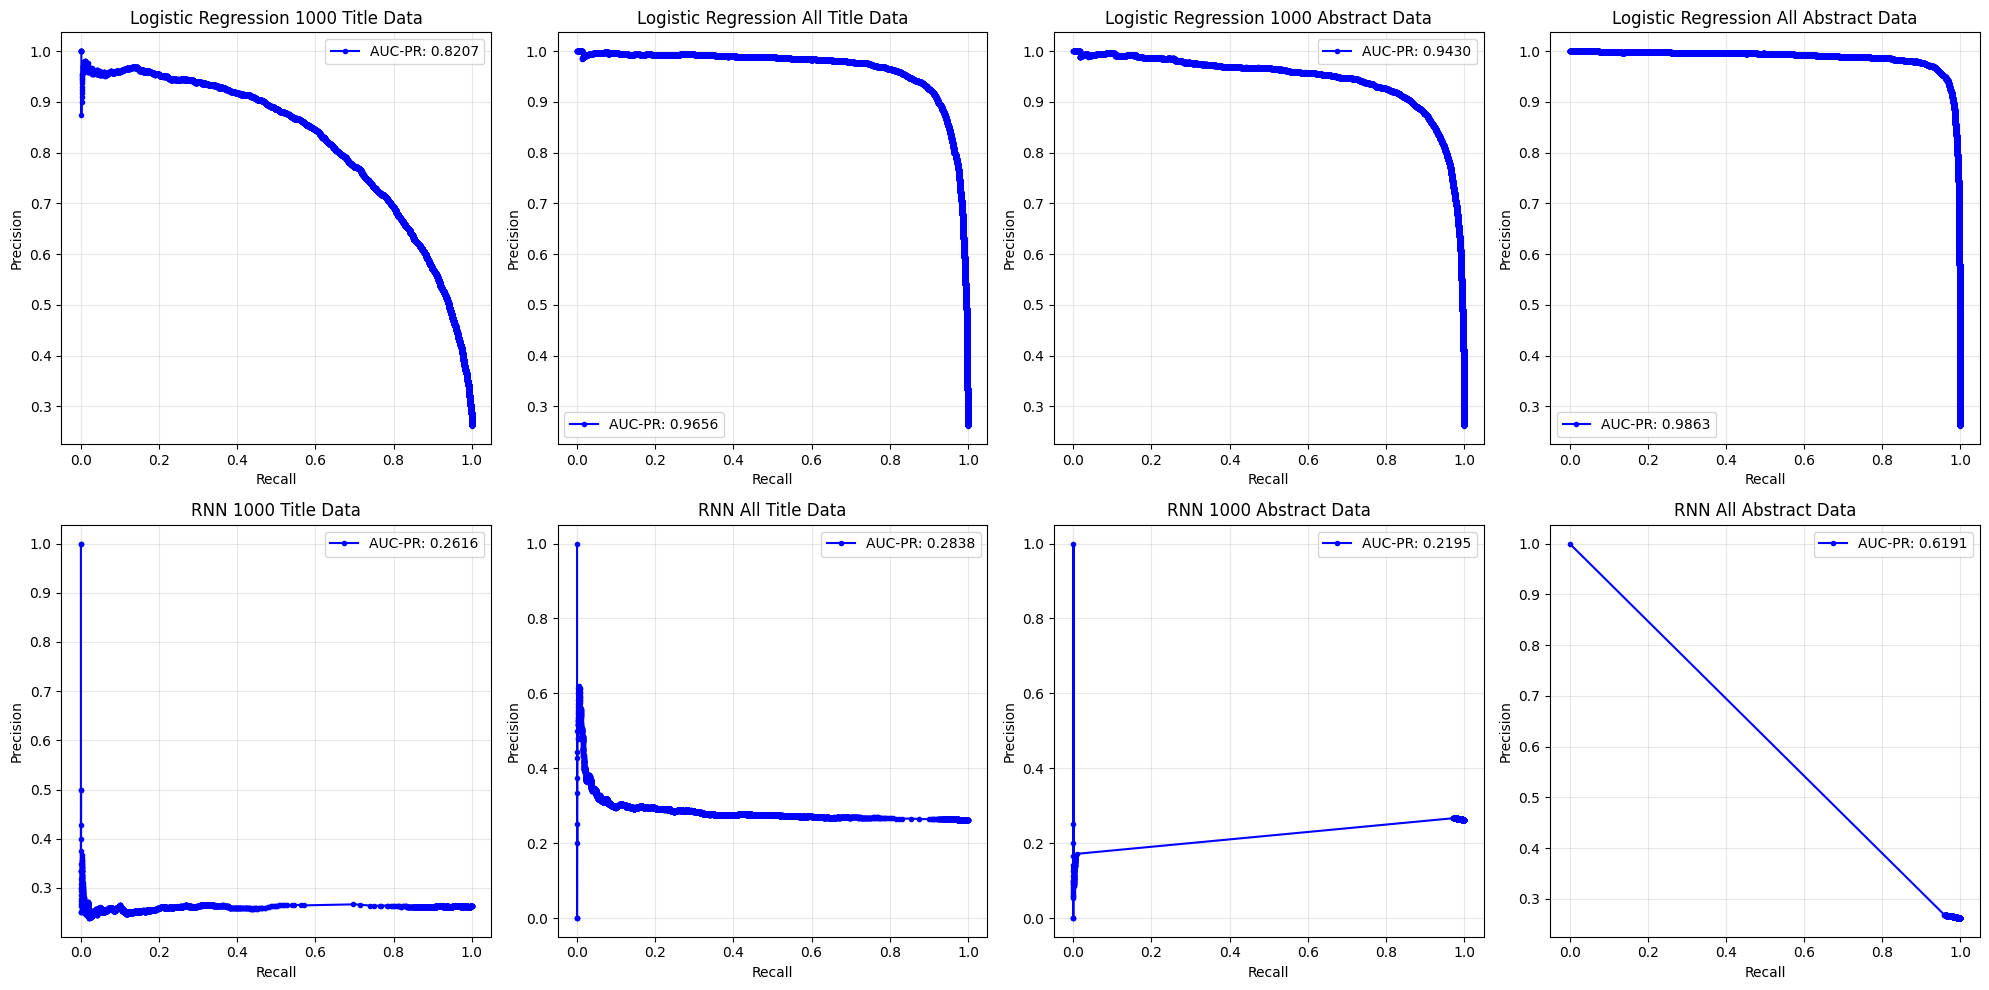

In [137]:
# Create figure with 2 rows x 4 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

# Plotting 8 configurations
for i in range(8):
    y_true = tc_results[i]["y_true"]
    y_scores = tc_results[i]["y_score"]
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    auc_pr = auc(recall, precision)
    axes[i].plot(recall, precision, marker='.', label=f"AUC-PR: {auc_pr:.4f}", color="blue")
    axes[i].set_xlabel("Recall")
    axes[i].set_ylabel("Precision")
    axes[i].set_title(tc_results[i]["Configuration"])
    axes[i].legend()
    axes[i].grid(alpha=0.3)
plt.tight_layout()
plt.show()


From the precision recall curves Logistic Regression consistently outperforms RNN, with abstracts yielding better results than titles due to their richer context. More training data improves performance, as seen in the higher AUC-PR scores for the full dataset. The Logistic Regression curve is smooth and well-shaped, maintaining high precision before gradually decreasing as recall increases. In contrast, the RNN curve is erratic and steep, reflecting instability and a poor precision-recall trade-off. The best model, Logistic Regression with all abstracts (AUC-PR: 0.9863), benefits from detailed inputs and a larger dataset, while RNN struggles with short text and long dependencies. Overall, Logistic Regression with full abstracts is the most reliable model.

<div class="alert alert-block alert-warning">

## Part 2: Topic Modelling <a class="anchor" name="part2"></a>

In Part 2: Topic Modeling, we apply Latent Dirichlet Allocation (LDA) to uncover hidden topics in the dataset. We explore different runnings (use bi-grams vs. not) and dataset sizes (1000 vs. 20,000 samples) to analyze how topic modeling captures meaningful structures in research articles. Moreover, in this section we will use abstract data rather than title data, considering that in the previous part, abstract data performed better than title data.

</div>

In [138]:
article_1k = train_abstract[:1000].drop(columns=['cl_binary'])
article_20k = train_abstract[:20000].drop(columns=['cl_binary'])

<div class="alert alert-block alert-info">
   
### Part 2A: Data Pre-Processing <a class="anchor" name="preprocess"></a>


</div>

In this code, we define several functions for text preprocessing and bigram generation. The preprocess_spacy function cleans the text, tokenizes it, and performs lemmatization using spaCy, while also removing stopwords and non-alphabetic tokens. Then, the generate_bigrams function creates bigrams from tokenized text using Gensim’s Phrases model, allowing frequently co-occurring words to be combined. Finally, the filter_bigrams function extracts only the bigram phrases from the processed text, ensuring that only meaningful multi-word expressions remain.

In [139]:
nlp = spacy.load('en_core_web_sm')

# Function to clean, lemmatize, and tokenize
def preprocess_spacy(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return tokens

# Function to generate the bi-grams
def generate_bigrams(unigram_column):
    bigram_model = Phrases(unigram_column, min_count=5, threshold=10)
    return [bigram_model[doc] for doc in unigram_column]

# Function to filter bi-grams only
def filter_bigrams(unigram_bigram_column):
    only_bigram = [[phrase for phrase in doc if "_" in phrase] for doc in unigram_bigram_column]
    return only_bigram

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [140]:
# Applying functions to 1000 articles
article_1k["tokens_unigram"] = article_1k["abstract"].apply(preprocess_spacy)
article_1k["unigram_bigram"] = generate_bigrams(article_1k["tokens_unigram"])
article_1k["tokens_bigram"] = filter_bigrams(article_1k["unigram_bigram"])
article_1k.head()

,abstract,tokens_unigram,unigram_bigram,tokens_bigram
0,Reinforcement learning algorithms rely on ca...,"[reinforcement, learning, algorithm, rely, car...","[reinforcement_learning, algorithm, rely, care...","[reinforcement_learning, good_performance]"
1,We prove that the known formulae for computi...,"[prove, know, formulae, compute, optimal, numb...","[prove, know, formulae, compute, optimal, numb...","[finite_field, finite_field]"
2,Biomedical language understanding benchmarks...,"[biomedical, language, understanding, benchmar...","[biomedical, language, understanding, benchmar...","[artificial_intelligence, large_language, mode..."
3,We consider distributed recursive estimation...,"[consider, distribute, recursive, estimation, ...","[consider, distribute, recursive, estimation, ...",[exist_method]
4,Road detection or traversability analysis ha...,"[road, detection, traversability, analysis, ke...","[road, detection, traversability, analysis, ke...","[binary_classification, contrastive_learning, ..."


We apply our preprocessing functions to two datasets: one with 1000 articles and another with 20,000 articles. Each dataset undergoes multiple transformations to extract useful linguistic features.

- tokens_unigram: This column contains lemmatized unigrams (individual words) obtained after cleaning, tokenizing, and removing stopwords using spaCy.
- unigram_bigram: This column stores both unigrams and bigrams, where bigrams are generated using Gensim’s Phrases model.
tokens_bigram: This column contains only bigrams, filtering out the - unigrams to retain meaningful multi-word expressions.

These processed columns serve as inputs for topic modeling in the next stage.

In [141]:
# Applying functions to 20000 articles
article_20k["tokens_unigram"] = article_20k["abstract"].apply(preprocess_spacy)
article_20k["unigram_bigram"] = generate_bigrams(article_20k["tokens_unigram"])
article_20k["tokens_bigram"] = filter_bigrams(article_20k["unigram_bigram"])
article_20k.head()

,abstract,tokens_unigram,unigram_bigram,tokens_bigram
0,Reinforcement learning algorithms rely on ca...,"[reinforcement, learning, algorithm, rely, car...","[reinforcement_learning, algorithm, rely, care...","[reinforcement_learning, reward_function, rewa..."
1,We prove that the known formulae for computi...,"[prove, know, formulae, compute, optimal, numb...","[prove, know, formulae, compute, optimal, numb...","[quantum_errorcorrecting, finite_field, linear..."
2,Biomedical language understanding benchmarks...,"[biomedical, language, understanding, benchmar...","[biomedical, language_understanding, benchmark...","[language_understanding, artificial_intelligen..."
3,We consider distributed recursive estimation...,"[consider, distribute, recursive, estimation, ...","[consider, distribute, recursive, estimation, ...","[sensing_communication, sensing_communication,..."
4,Road detection or traversability analysis ha...,"[road, detection, traversability, analysis, ke...","[road, detection, traversability, analysis, ke...","[mobile_robot, offroad_scene, binary_classific..."


<div class="alert alert-block alert-info">
   
### Part 2B: Exploratory Data Analysis <a class="anchor" name="eda"></a>

Before we go trough the model building, we need to see the data condition first in Exploratory Data Analysis (EDA) part. This part including visualizing the data using wordcloud and bar charts.

</div>

As part of the Exploratory Data Analysis (EDA), we define a function to visualize the most frequently occurring words using a WordCloud. The function generate_wordcloud takes a list of tokenized texts and a title as input. This helps in understanding the most dominant words in our dataset before applying topic modeling.

In [142]:
# Function to create WordCloud
def generate_wordcloud(tokens_list, title):
    text = " ".join([" ".join(tokens) for tokens in tokens_list])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

Then, we define functions to analyze word frequency distribution. The first function is count_words, which counts the occurrences of each word in a list of tokenized texts. The other function is plot_top_words, that creates a bar chart of the top 30 most frequent words in a given column of a DataFrame. It first retrieves word frequencies, converts them into a DataFrame, and then uses Plotly Express to generate an interactive bar chart. The visualization helps in identifying the most dominant words in the dataset before applying topic modeling.

In [143]:
# Function to count word frequencies
def count_words(tokens_list):
    word_freq = Counter()
    for tokens in tokens_list:
        word_freq.update(tokens)
    return word_freq

# Function to create word frequencies bar chart
def plot_top_words(df, column_name, title):
    word_freq = count_words(df[column_name])
    top_words = dict(word_freq.most_common(30))
    freq_df = pd.DataFrame(list(top_words.items()), columns=["word", "count"])
    fig = px.bar(freq_df, x="word", y="count",
                 title=title, text_auto=True, color_discrete_sequence=["light blue"])
    fig.update_layout(xaxis_title=None, yaxis_title="Frequency",
                      xaxis_tickangle=-45, plot_bgcolor="whitesmoke")
    fig.show()

#### EDA on 1000 Articles

We apply our EDA functions on the 1000-article dataset to visualize key linguistic patterns before topic modeling.

- WordCloud (unigram_bigram): We use this column because it contains both unigrams and bigrams, providing a broader view of commonly used terms in the dataset.
- Unigram Bar Chart (tokens_unigram): This column represents single-word tokens after lemmatization and stopword removal, helping us analyze the most frequent standalone words.
- Bigram Bar Chart (tokens_bigram): Since this column contains only bigrams, the visualization highlights multi-word expressions that frequently occur together, revealing more context-rich patterns.

We conduct this analysis on 1000 articles first to quickly identify trends before scaling up to a larger dataset.

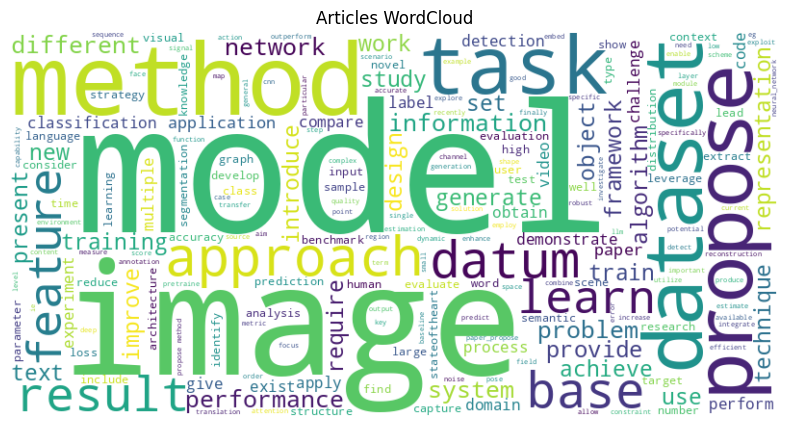

In [144]:
# Plot WordCloud
generate_wordcloud(article_1k['unigram_bigram'], "Articles WordCloud")

In [145]:
# Plot Unigram
plot_top_words(article_1k, 'tokens_unigram', "Top 30 Unigram")

In [146]:
# Plot Bigram
plot_top_words(article_1k, 'tokens_bigram', "Top 30 Bigram")

#### EDA on 20000 Articles

After performing EDA on 1000 articles, we now apply the same visualizations to the 20000 article dataset using the same column names.

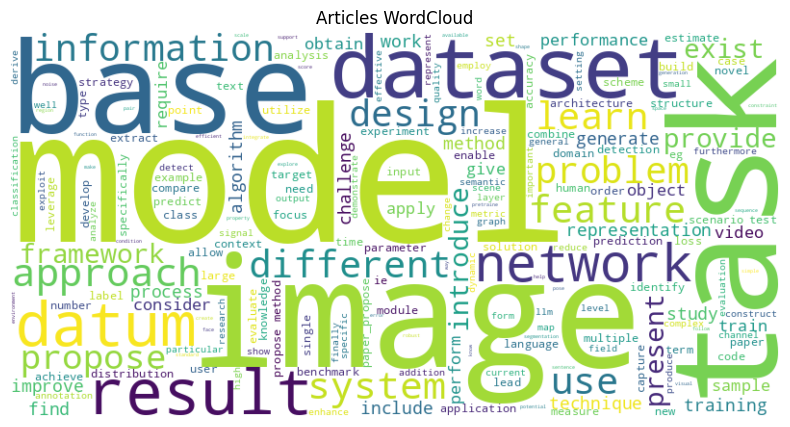

In [147]:
# Plot WordCloud
generate_wordcloud(article_20k['unigram_bigram'], "Articles WordCloud")

In [148]:
# Plot Unigram
plot_top_words(article_20k, 'tokens_unigram', "Top 30 Unigram")

In [149]:
# Plot Bigram
plot_top_words(article_20k, 'tokens_bigram', "Top 30 Bigram")

From the charts above, we can see the differences between the EDA results for 1000 and 20,000 articles. Some dominant words in the 1000-article dataset are no longer dominant in the 20,000-article dataset, such as the word method. This pattern applies to both unigrams and bigrams, indicating that word frequency distributions shift as the dataset size increases.

<div class="alert alert-block alert-info">
   
### Part 2C: LDA Training <a class="anchor" name="train"></a>

This stage is conducted to train Latent Dirichlet Allocation (LDA) model to do topic modelling.

</div>

This function, prepare_lda_data, creates a dictionary and corpus for training the LDA model. It first builds a Gensim Dictionary from tokenized texts, mapping each unique word to an ID. Then, it applies filter_extremes(no_below=20, no_above=0.5), which removes words that appear in fewer than 20 documents (to reduce noise) and words that appear in more than 50% of documents (to eliminate overly common terms). Finally, it converts the tokenized texts into a bag-of-words (BoW) representation, which is the required input format for LDA.

In [150]:
# Create dictionary & corpus for LDA
def prepare_lda_data(tokenized_texts):
    dictionary = corpora.Dictionary(tokenized_texts)
    dictionary.filter_extremes(no_below=20, no_above=0.5)  # Filter words that are too rare or common
    corpus = [dictionary.doc2bow(text) for text in tokenized_texts]
    return dictionary, corpus

The train_lda function trains an LDA model by first preparing the dictionary and corpus, then applying LDA to extract topics from the text. This function initializes a Gensim LDA model that will extract 10 distinct topics from the data. It optimizes topic distribution using specific hyperparameters and returns the trained model, corpus, and dictionary for further analysis and visualization.

In [151]:
# Function to run LDA
def train_lda(tokenized_texts):
    dictionary, corpus = prepare_lda_data(tokenized_texts)
    # Train LDA model
    lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       chunksize=2000,
                                       alpha=0.1,
                                       eta=0.1,
                                       iterations=400,
                                       num_topics=10,
                                       passes=20,
                                       random_state=42)
    return lda_model, corpus, dictionary

This step applies the LDA model to four different configurations based on dataset size and tokenization method. The function train_lda() is called on both 1000-article (article_1k) and 20,000-article (article_20k) datasets, using unigrams (tokens_unigram) and bigrams (unigram_bigram) as input. This results in four trained LDA models, each producing different topic distributions. The output includes the LDA model, corpus, and dictionary for each configuration, which will be used for further topic analysis and visualization.

In [152]:
# Applying functions to 4 configurations
lda_1k_unigram, corpus_1k_unigram, dict_1k_unigram = train_lda(article_1k['tokens_unigram'])
lda_1k_bigram, corpus_1k_bigram, dict_1k_bigram = train_lda(article_1k['unigram_bigram'])
lda_20k_unigram, corpus_20k_unigram, dict_20k_unigram = train_lda(article_20k['tokens_unigram'])
lda_20k_bigram, corpus_20k_bigram, dict_20k_bigram = train_lda(article_20k['unigram_bigram'])

<div class="alert alert-block alert-info">
   
### Part 2D: LDA Visualization <a class="anchor" name="vis"></a>

And finally, we visualize the LDA topic modeling results. We create this function, which takes as input the LDA model, corpus, and dictionary generated from the previous function, and produces an interactive topic visualization to better interpret the extracted topics.

</div>

In [153]:
# Function to create LDA visualization with pyLDAvis
def visualize_lda(lda_model, corpus, dictionary):
    vis = gensimvis.prepare(lda_model, corpus, dictionary)
    return pyLDAvis.display(vis)

Moreover, we create the function to see the exemplar articles to illustrate key topics.

In [154]:
# Function to show exemplar articles for a topic
def show_exemples(lda_model, corpus, dictionary, texts, topic_num, top_n=3):
    topic_articles = []
    # Get topic distribution for all articles
    topic_distributions = lda_model.get_document_topics(corpus)
    # Find articles where the specified topic has high probability
    for i, distribution in enumerate(topic_distributions):
        for topic, prob in distribution:
            if topic == topic_num and prob > 0.3:  # Adjust threshold if needed
                topic_articles.append(texts[i])
                break
        if len(topic_articles) >= top_n:
            break
    # Show first 300 characters
    return print("\n".join([f"Example {i+1}: {article[:300]}...\n" for i, article in enumerate(topic_articles)]))

#### Topic Modelling 1000 Articles without Bi-Grams

We apply the LDA visualization to the first configuration using 1000 articles with unigrams. The results show that Topic 2 and Topic 5 overlap, discussing graphs and images, respectively. Additionally, Topic 10 is positioned far from the others, indicating that it covers a more distinct subject, specifically related to prompt and NLP (Natural language processing).

In [155]:
visualize_lda(lda_1k_unigram, corpus_1k_unigram, dict_1k_unigram)

In [173]:
# Topic 2
show_exemples(lda_1k_unigram, corpus_1k_unigram, dict_1k_unigram, article_1k['abstract'], 1)

Example 1:   Biomedical language understanding benchmarks are the driving forces for
artificial intelligence applications with large language model (LLM) back-ends.
However, most current benchmarks: (a) are limited to English which makes it
challenging to replicate many of the successes in English for other la...

Example 2:   Cytology is a low-cost and non-invasive diagnostic procedure employed to
support the diagnosis of a broad range of pathologies. Computer Vision
technologies, by automatically generating quantitative and objective
descriptions of examinations' contents, can help minimize the chances of
misdiagnoses...

Example 3:   Convolutional Neural Network (CNN) has been successfully applied on
classification of both natural images and medical images but not yet been
applied to differentiating patients with schizophrenia from healthy controls.
Given the subtle, mixed, and sparsely distributed brain atrophy patterns of
sc...



In [174]:
# Topic 5
show_exemples(lda_1k_unigram, corpus_1k_unigram, dict_1k_unigram, article_1k['abstract'], 4)

Example 1:   We present a new autoencoder-type architecture that is trainable in an
unsupervised mode, sustains both generation and inference, and has the quality
of conditional and unconditional samples boosted by adversarial learning.
Unlike previous hybrids of autoencoders and adversarial networks, the
adve...

Example 2:   Subspace clustering is the classical problem of clustering a collection of
data samples that approximately lie around several low-dimensional subspaces.
The current state-of-the-art approaches for this problem are based on the
self-expressive model which represents the samples as linear combinatio...

Example 3:   In light of the success of the pre-trained language models (PLMs), continual
pre-training of generic PLMs has been the paradigm of domain adaption. In this
paper, we propose QUERT, A Continual Pre-trained Language Model for QUERy
Understanding in Travel Domain Search. QUERT is jointly trained on f...



#### Topic Modelling 1000 Articles with Bi-Grams

We then apply LDA visualization to the 1000-article bigram model, and the results differ from the unigram configuration. Topic 2 and Topic 5 are now positioned on opposite sides, with Topic 5 overlapping with Topic 10. Topic 2 discusses video, multimodal learning, and diffusion models, while Topic 5 focuses on transmission, simulations, and assumptions. Meanwhile, Topic 10 covers medical diagnosis, uncertainty, and decision-making tools. The proximity between Topics 5 and 10 suggests a shared theme of prediction and uncertainty, where simulations and assumptions in Topic 5 relate to predictive modeling in medical diagnosis (Topic 10).

In [158]:
visualize_lda(lda_1k_bigram, corpus_1k_bigram, dict_1k_bigram)

In [175]:
# Topic 10
show_exemples(lda_1k_bigram, corpus_1k_bigram, dict_1k_bigram, article_1k['abstract'], 9)

Example 1:   We consider distributed recursive estimation of consensus+innovations type in
the presence of heavy-tailed sensing and communication noises. We allow that
the sensing and communication noises are mutually correlated while independent
identically distributed (i.i.d.) in time, and that they may both...

Example 2:   The performance of short polar codes under successive cancellation (SC) and
SC list (SCL) decoding is analyzed for the case where the decoder messages are
coarsely quantized. This setting is of particular interest for applications
requiring low-complexity energy-efficient transceivers (e.g.,
inter...

Example 3:   In this paper we focus on the tracking performance of incremental adaptive
LMS algorithm in an adaptive network. For this reason we consider the unknown
weight vector to be a time varying sequence. First we analyze the performance
of network in tracking a time varying weight vector and then we exp...



#### Topic Modelling 20000 Articles without Bi-Grams

As we apply LDA visualization to the 20,000-article unigram model, the results differ significantly from the 1000-article dataset, suggesting a possible topic shift due to the larger corpus. In this configuration, Topics 5 and 7 overlap, where Topic 7 discusses communication-related terms (channel, energy, antenna), while Topic 5 focuses on quantum concepts (subspace, entropy). This overlap might indicate a connection between quantum information theory and communication systems. Additionally, Topics 4 and 6 also overlap, where Topic 4 covers medical and clinical diagnosis (augmentation, annotation, datum), while Topic 6 relates to linguistic elements (word, speech, sentence, embedding). Their proximity may suggest an intersection between natural language processing (NLP) and medical applications, such as clinical text analysis or automated diagnosis.

In [160]:
visualize_lda(lda_20k_unigram, corpus_20k_unigram, dict_20k_unigram)

In [176]:
# Topic 4
show_exemples(lda_20k_unigram, corpus_20k_unigram, dict_20k_unigram, article_20k['abstract'], 3)

Example 1:   Road detection or traversability analysis has been a key technique for a
mobile robot to traverse complex off-road scenes. The problem has been mainly
formulated in early works as a binary classification one, e.g. associating
pixels with road or non-road labels. Whereas understanding scenes with
f...

Example 2:   The recent advancement of pre-trained Transformer models has propelled the
development of effective text mining models across various biomedical tasks.
However, these models are primarily learned on the textual data and often lack
the domain knowledge of the entities to capture the context beyond ...

Example 3:   In this paper, we address the challenging problem of spatial and temporal
action detection in videos. We first develop an effective approach to localize
frame-level action regions through integrating static and kinematic information
by the early- and late-fusion detection scheme. With the intentio...



In [177]:
# Topic 6
show_exemples(lda_20k_unigram, corpus_20k_unigram, dict_20k_unigram, article_20k['abstract'], 5)

Example 1:   Model explanations such as saliency maps can improve user trust in AI by
highlighting important features for a prediction. However, these become
distorted and misleading when explaining predictions of images that are subject
to systematic error (bias) by perturbations and corruptions. Furthermore,...

Example 2:   This study is main goal is to provide a comparative comparison of libraries
using machine learning methods. Experts in natural language processing (NLP)
are becoming more and more interested in sentiment analysis (SA) of text
changes. The objective of employing NLP text analysis techniques is to
r...

Example 3:   Traditional discriminative approaches in mental health analysis are known for
their strong capacity but lack interpretability and demand large-scale
annotated data. On the other hand, generative approaches, such as those based
on large language models (LLMs),have the potential to get rid of heavy
...



#### Topic Modelling 20000 Articles with Bi-Grams

When applying LDA visualization to the 20,000-article bigram model, the results differ from the unigram version. Here, Topics 7 and 5 are no longer overlapping, suggesting that the increased dataset and use of bigrams helped distinguish quantum-related discussions (Topic 5) from communication systems (Topic 7). However, Topics 4 and 6 remain close, though not overlapping, reinforcing the idea that medical applications (Topic 4) and linguistic elements (Topic 6) are still somewhat related, possibly through NLP applications.

In [164]:
visualize_lda(lda_20k_bigram, corpus_20k_bigram, dict_20k_bigram)

In [178]:
# Topic 2
show_exemples(lda_20k_bigram, corpus_20k_bigram, dict_20k_bigram, article_20k['abstract'], 1)

Example 1:   We prove that the known formulae for computing the optimal number of
maximally entangled pairs required for entanglement-assisted quantum
error-correcting codes (EAQECCs) over the binary field hold for codes over
arbitrary finite fields as well. We also give a Gilbert-Varshamov bound for
EAQECCs a...

Example 2:   We consider distributed recursive estimation of consensus+innovations type in
the presence of heavy-tailed sensing and communication noises. We allow that
the sensing and communication noises are mutually correlated while independent
identically distributed (i.i.d.) in time, and that they may both...

Example 3:   We address security and privacy problems for digital devices and biometrics
from an information-theoretic optimality perspective, where a secret key is
generated for authentication, identification, message encryption/decryption, or
secure computations. A physical unclonable function (PUF) is a pro...



<div class="alert alert-block alert-warning">

## References <a class="anchor" name="Ref"></a>

1. **Google Colab** – Used as the development environment for implementing and running the project.  
2. **PyTorch Text Installation Guide** – Installation steps for `torchtext` from the official repository: [GitHub - PyTorch/Text Releases](https://github.com/pytorch/text/releases).  
3. **ITI5212 Data Analysis for Semi-Structured Data (Week 2 & Week 3)** – Lecture materials used as code references for Part 1: Text Classification and Part 2: Topic Modelling.  
4. **Gemini AI** – Used for debugging minor errors during implementation.  
5. **ChatGPT** – Assisted in debugging functions related to **statistical models, RNN implementation, and LDA topic modeling**.  
6. **StackExchange Discussion on LDA Hyperparameters** – Reference for determining appropriate values for `alpha` and `eta` in LDA training: [How high is high, and how low is low in Latent Dirichlet Allocation (LDA) alpha and eta?](https://stats.stackexchange.com/questions/195490/how-high-is-high-and-how-low-is-low-in-latent-dirichlet-allocation-alpha-and).

</div>